In [35]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
plt.close('all')

df1 = pd.read_csv("C:/Users/Huawei/Physician_Compare_National_Downloadable_File.csv", low_memory=False)
df2 = pd.read_csv("C:/Users/Huawei/Physician_Compare_2015_Individual_EP_Public_Reporting___Performance_Scores.csv", low_memory=False)

In [2]:
female=df1.loc[(df1["Gender"]=="F"), ["Gender"]]
female_accept=df1.loc[(df1["Gender"]=="F") & (df1["Professional accepts Medicare Assignment"]=="Y"), ["NPI","PAC ID","Medical school name","Graduation year"]]
male=df1.loc[(df1["Gender"]=="M"), ["Gender"]]
male_accept=df1.loc[(df1["Gender"]=="M") & (df1["Professional accepts Medicare Assignment"]=="Y"), ["NPI","PAC ID","Medical school name","Graduation year"]]
am=df1.loc[(df1["Gender"]=="M") & (df1["Professional accepts Medicare Assignment"]=="Y"), ["NPI","Medical school name","Graduation year"]]
af=df1.loc[(df1["Gender"]=="F") & (df1["Professional accepts Medicare Assignment"]=="Y"), ["NPI","Medical school name","Graduation year"]]
df2_flu=df2.loc[(df2["Measure Title"]=="Preventive Care and Screening: Influenza Immunization"),["NPI","Measure Performance Rate"]]

In [3]:
flum=pd.merge(am, df2_flu, on='NPI').drop_duplicates().dropna()
flum.columns=[c.replace(' ', '_') for c in flum.columns]
fluf=pd.merge(af, df2_flu, on='NPI').drop_duplicates().dropna()
fluf.columns=[c.replace(' ', '_') for c in fluf.columns]

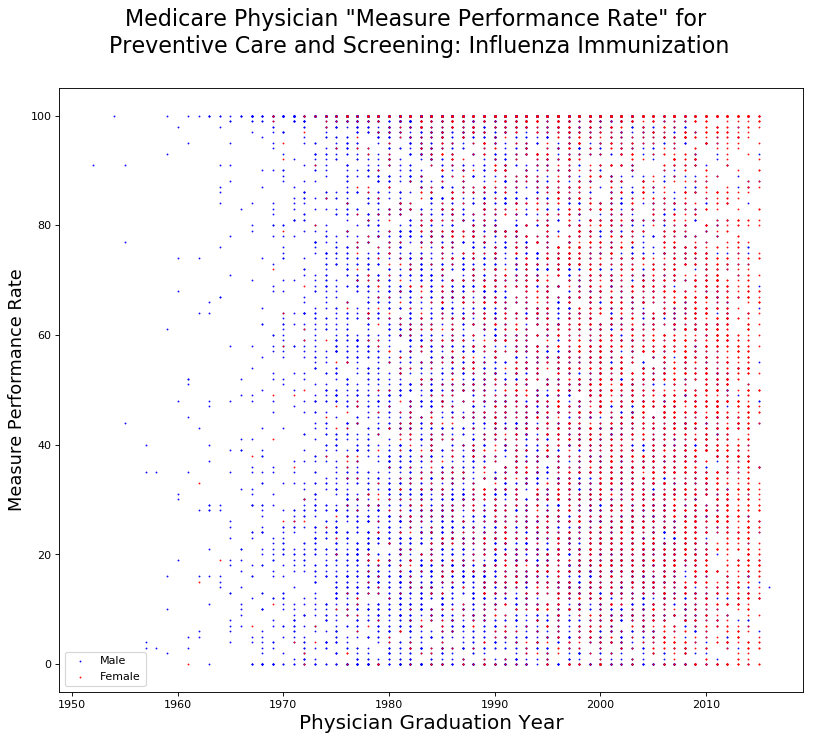

In [4]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('Medicare Physician "Measure Performance Rate" for \nPreventive Care and Screening: Influenza Immunization', fontsize=20)
plt.xlabel('Physician Graduation Year', fontsize=18)
plt.ylabel('Measure Performance Rate', fontsize=16)
ax1=plt.scatter(flum['Graduation_year'], flum['Measure_Performance_Rate'], c='blue', s=0.4, label="Male")
ax2=plt.scatter(fluf['Graduation_year'], fluf['Measure_Performance_Rate'], c='red', s=0.4, label="Female")
plt.gca().legend()
plt.show()

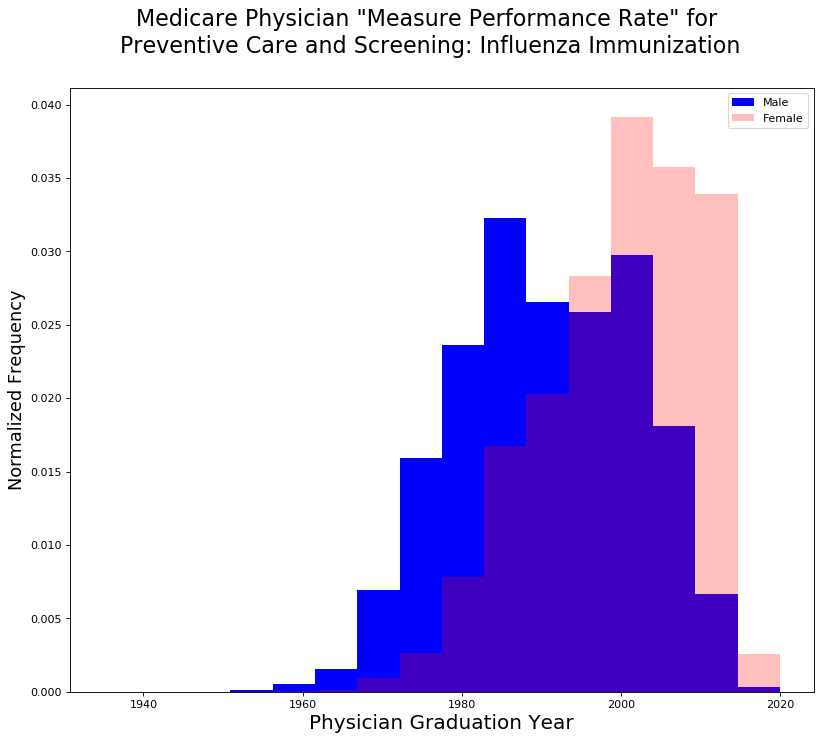

In [30]:
d = np.linspace(1935,2020,17)
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('Medicare Physician "Measure Performance Rate" for \nPreventive Care and Screening: Influenza Immunization', fontsize=20)
plt.xlabel('Physician Graduation Year', fontsize=18)
plt.ylabel('Normalized Frequency', fontsize=16)
ax3=plt.hist(flum['Graduation_year'], label="Male", bins=d, color='blue', normed=True)
ax4=plt.hist(fluf['Graduation_year'], label="Female", bins=d, color='red', normed=True, alpha=0.25)
plt.gca().legend()
plt.show()

In [34]:
male_mean=flum["Measure_Performance_Rate"].mean()


In [32]:
fluf["Measure_Performance_Rate"].mean()


52.920901167571124